# Lesson 06 Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

### Some basic EDA
present the first few rows and use pandas' `describe` to get an overview of the data
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[0 point]</span>

In [2]:
print(churn.head())
print(churn.describe())


   user_id gender address  store_id  trans_id       timestamp       item_id  \
0   101981      F       E      2860    818463  11/1/2000 0:00  4.710000e+12   
1   101981      F       E      2861    818464  11/1/2000 0:00  4.710000e+12   
2   101981      F       E      2862    818465  11/1/2000 0:00  4.710000e+12   
3   101981      F       E      2863    818466  11/1/2000 0:00  4.710000e+12   
4   101981      F       E      2864    818467  11/1/2000 0:00  4.710000e+12   

   quantity  dollar  
0         1      37  
1         1      17  
2         1      23  
3         1      41  
4         8     288  
            user_id       store_id      trans_id       item_id       quantity  \
count  2.522040e+05  252204.000000  2.522040e+05  2.522040e+05  252204.000000   
mean   1.395660e+06  126101.500000  1.229771e+06  4.467833e+12       1.385692   
std    6.094769e+05   72805.167983  2.350992e+05  1.679512e+12       3.705732   
min    1.113000e+03       0.000000  8.177470e+05  2.000882e+07       

The new data frame will be called `churn_processed`, which stores the pre-processed columns as you run through each of the these steps. You will need to make sure your columns are properly named.

1. Cast the `timestamp` column in churn into a column of type `datetime` and put the column into the `churn_processed` dataframe.  The new column should also be named `timestamp`.  Extract two new columns from `timestamp`: `dow` is the day of the week and `month` is the month of the year. Then drop the `timestamp` column from `churn_processed`.  Present the first few rows of `churn_processed`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

I created a new data frame by using the .DataFrame function. To cast timestamp to datetime I created a new column on the left side of the equation and did the datetime function on the right. To create the dow column its similar as above by creating the new columnm on the left side of the equation and the dayofweek property on the right. I had a hard time with this at first because I put () thinking dayofweek was a function and not a property. No () are neccessary. The same process was done for the month column. Then I dropped the timestamp column from the churn_processed dataframe. 

In [3]:
# Add code here
# Create the new (empty) data frame, called churn_processed
churn_processed = pd.DataFrame() 

# Cast timestamp to datetime
churn_processed['timestamp'] = pd.to_datetime(churn.timestamp)


# Create a dow column
churn_processed['dow'] = churn_processed['timestamp'].dt.dayofweek



# Create a month column
churn_processed['month'] = churn_processed['timestamp'].dt.month
# Drop Timestamp
churn_processed = churn_processed.drop(['timestamp'], axis =1) # have to assigned it back to the dataframe. I keep forgetting to do this!

# See what we have
print(churn_processed.head())

   dow  month
0    2     11
1    2     11
2    2     11
3    2     11
4    2     11


2. Add `address` from `churn` to `churn_processed`. One-hot encode `address`, `dow` and `month`. Then drop columns `address`, `dow`, and `month` from `churn_processed`.  Finally, show some of the dataframe.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>  

I created the new address column has I have done before. To do one-hot encoding I used the formula provided to us. I didn't need to drop the columns address, dow and month it does that already in the code. 

In [4]:

# add address column
churn_processed['address'] = churn['address']

print(churn_processed.head())
# One-hot-encode address, dow and month

# get package
from sklearn.preprocessing import OneHotEncoder


onehot = OneHotEncoder(sparse = False) 
onehot.fit(churn_processed)
col_names = onehot.get_feature_names_out(churn_processed.columns) # create column names
churn_processed =  pd.DataFrame(onehot.transform(churn_processed), columns = col_names) # by assigning it to churn_processed we get rid of address, dow, and month

# Show the dataframe
churn_processed.head()






   dow  month address
0    2     11       E
1    2     11       E
2    2     11       E
3    2     11       E
4    2     11       E


,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


3. So far we dropped `address`, `dow`, `month`, and `timestamp`.  Why would we want to drop all these columns?
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

**Why would we want to drop all these columns?**<br/>
Because they arn't in a format thats usuable for us. 


4. Rescale `dollar` using min-max normalization. Use `pandas` and `numpy` to do it and call the rescaled column `dollar_std_minmax`.  Then see what the first few rows of the dataframe looks like.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

I used min-max normalization and created a new column dollar_std_minmax.

In [5]:
# Min-max of dollar using numpy and pandas

offset = min(churn.dollar) #important to remember to use churn.dollar and not just dollar. 
scale = max(churn.dollar) - min(churn.dollar)
churn['dolar_std_minmax'] = (churn.dollar - offset)/scale
# See what the dataframe looks like
print(churn.round(decimals=2))






        user_id gender address  store_id  trans_id       timestamp  \
0        101981      F       E      2860    818463  11/1/2000 0:00   
1        101981      F       E      2861    818464  11/1/2000 0:00   
2        101981      F       E      2862    818465  11/1/2000 0:00   
3        101981      F       E      2863    818466  11/1/2000 0:00   
4        101981      F       E      2864    818467  11/1/2000 0:00   
...         ...    ...     ...       ...       ...             ...   
252199  2179605      B       G    251838   1630692  2/28/2001 0:00   
252200  2179605      B       G    251839   1630821  2/28/2001 0:00   
252201  2179605      B       G    251840   1630931  2/28/2001 0:00   
252202  2179605      B       G    251841   1631033  2/28/2001 0:00   
252203  2179605      B       G    251842   1631048  2/28/2001 0:00   

             item_id  quantity  dollar  dolar_std_minmax  
0       4.710000e+12         1      37               0.0  
1       4.710000e+12         1      17   

You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that behave reasonably even if the data is unusual.  For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not.  In this respect a normalization is similar to an average. For a normalization **robust** might mean that the method is not affected by outliers. 
<br/><br/>
5. Write briefly about what makes robust normalization different from Z-normalization.  Write briefly about what makes robust normalization more robust than Z-normalization.  Rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust` and add it to `churn_processed`.  Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust'].  Comment on what went wrong.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

**Robust normalization vs. Z-normalization**<br/>
Z normalization puts the entire data set on scale where the mean of all values is 0 and the SD is 1. 
Robust normalization uses the forumla value = (value – median) / (p75 – p25) to normalize. 

**Robust normalization is more robust than Z-normalization**<br/>

  By focusing on the 25% through 75% quartile you are getting rid of a lot of the noise in the data. Or in otherwords because outliers will appear outside the the 1st and 3rd quartile by using the 1st and 3rd you are minimizing the effects of either high or low outliers. 

# Add Code here:


I used the robust formula to do normalization for quantity but it proved to not be the a good fitting model which I explain why below. 

In [6]:
# Compare minimum, maximum, mean, standard deviation, and the median of churn['quantity'] with churn_processed['qty_std_robust']
offset = np.median(churn.quantity)
scale = np.quantile(churn.quantity, 0.75) - np.quantile(churn.quantity, 0.25) # np.median(np.absolute(x - np.median(x)))
print(scale, np.median(np.absolute(churn.quantity - np.median(churn.quantity))))
churn['qty_std_robust'] = (churn.quantity - offset)/scale
print(churn.round(decimals=2))


# add address column
churn_processed['qty_std_robust'] = churn['qty_std_robust']



0.0 0.0
        user_id gender address  store_id  trans_id       timestamp  \
0        101981      F       E      2860    818463  11/1/2000 0:00   
1        101981      F       E      2861    818464  11/1/2000 0:00   
2        101981      F       E      2862    818465  11/1/2000 0:00   
3        101981      F       E      2863    818466  11/1/2000 0:00   
4        101981      F       E      2864    818467  11/1/2000 0:00   
...         ...    ...     ...       ...       ...             ...   
252199  2179605      B       G    251838   1630692  2/28/2001 0:00   
252200  2179605      B       G    251839   1630821  2/28/2001 0:00   
252201  2179605      B       G    251840   1630931  2/28/2001 0:00   
252202  2179605      B       G    251841   1631033  2/28/2001 0:00   
252203  2179605      B       G    251842   1631048  2/28/2001 0:00   

             item_id  quantity  dollar  dolar_std_minmax  qty_std_robust  
0       4.710000e+12         1      37               0.0             NaN  
1

In [7]:

print(churn.quantity.describe())
print(churn_processed.qty_std_robust.describe())

count    252204.000000
mean          1.385692
std           3.705732
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1200.000000
Name: quantity, dtype: float64
count    54810.0
mean         inf
std          NaN
min          inf
25%          NaN
50%          NaN
75%          NaN
max          inf
Name: qty_std_robust, dtype: float64


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


**Failure of Robust Normalization**<br/>
the scale is zero and np.median(np.absolute(churn.quantity - np.median(churn.quantity is also zero. So you will end up trying to divide zero by zero. You can see the issue with quantity when you .describe it and see that the min, 25%, 50%, 75% are all 1. 
When you try to use robust normalization it wont work. 

6. Rescale `quantity` using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Present a histogram of `qty_std_Z_byuser`.  Briefly describe why and when you think this kind of normalization makes sense.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

At first I tried to use grouped without adding the .transform and realized that wouldn't work because grouped isn't a dataframe. After creating offset and scale you proceed as normal. 

In [8]:

# Step 1: Group the data by 'user_id'
grouped = churn.groupby('user_id')

# Step 2: Calculate mean and standard deviation of 'quantity' for each group
offset = grouped.quantity.transform('mean') # have to use .transform
scale = grouped.quantity.transform('std')

# Step 3: Z-normalize 'quantity' per user_id
churn['qty_std_Z_byuser'] = (churn.quantity - offset) / scale

# Round the values if desired
churn['qty_std_Z_byuser'] = churn['qty_std_Z_byuser'].round(decimals=2)

# Print the resulting DataFrame
print(churn)


        user_id gender address  store_id  trans_id       timestamp  \
0        101981      F       E      2860    818463  11/1/2000 0:00   
1        101981      F       E      2861    818464  11/1/2000 0:00   
2        101981      F       E      2862    818465  11/1/2000 0:00   
3        101981      F       E      2863    818466  11/1/2000 0:00   
4        101981      F       E      2864    818467  11/1/2000 0:00   
...         ...    ...     ...       ...       ...             ...   
252199  2179605      B       G    251838   1630692  2/28/2001 0:00   
252200  2179605      B       G    251839   1630821  2/28/2001 0:00   
252201  2179605      B       G    251840   1630931  2/28/2001 0:00   
252202  2179605      B       G    251841   1631033  2/28/2001 0:00   
252203  2179605      B       G    251842   1631048  2/28/2001 0:00   

             item_id  quantity  dollar  dolar_std_minmax  qty_std_robust  \
0       4.710000e+12         1      37          0.000510             NaN   
1      

I wanted to center the graph around zero so I figured out how to do that using plt.xlim 

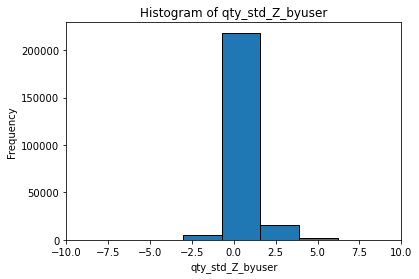

In [14]:
import matplotlib.pyplot as plt



# Create a histogram
plt.hist(churn['qty_std_Z_byuser'], bins=10, edgecolor='black')

# Set the x-axis limits to center the histogram around zero
plt.xlim(-10, 10)  

# Add labels and title
plt.xlabel('qty_std_Z_byuser')
plt.ylabel('Frequency')
plt.title('Histogram of qty_std_Z_byuser')

# Display the histogram
plt.show()



**What could be the purpose of this normalization?**
<br/>
Add comment here:
This could be useful if you have a lot of variablity among the users or if the user data is on different scales. 

7. Convert `item_id` into a category column in `churn_processed`.  Replace the `item_id` of all the items sold only once in the entire data with `"999999"`.  How many item ids are of category `"999999"`?  Display 10 rows of `churn_processed` where `item_id` is category `"999999"`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

First I created a new column in the churn_processed dataframe. then I used the astype(str) to turn item_id into a cateorical variable. Then I used .value_counts to create a list of how often each item_id occured. Then I created the variable itemWithOneTransaction which is what we are interested. Then using .loc and isin and the variables I previously made I assigned item_ids that only occured once to 999999. To get how many of 999999 there are I used the len function. To display 10 rows where item_id is 999999 I again used .loc. 

In [12]:
# Added item_id column to churn_processed
churn_processed['item_id'] = churn['item_id']

# turned into a category column
churn_processed['item_id'] = churn_processed['item_id'].astype(str)



s = churn_processed['item_id'].value_counts()
itemsWithOneTransaction = s.index[s == 1] # created variable here to make it easier to answer the question of how many ids are "999999" question. 
churn_processed.loc[churn_processed['item_id'].isin(itemsWithOneTransaction), 'item_id'] = '999999'
print(len(itemsWithOneTransaction)) 
print(churn_processed.loc[churn_processed['item_id'] == '999999'])


876
        dow_0  dow_1  dow_2  dow_3  dow_4  dow_5  dow_6  month_1  month_2  \
847       0.0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      0.0   
1415      0.0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      0.0   
1452      0.0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      0.0   
1457      0.0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      0.0   
1458      0.0    0.0    0.0    1.0    0.0    0.0    0.0      0.0      0.0   
...       ...    ...    ...    ...    ...    ...    ...      ...      ...   
249425    0.0    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0   
249854    0.0    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0   
250279    0.0    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0   
250377    0.0    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0   
250680    0.0    0.0    1.0    0.0    0.0    0.0    0.0      0.0      1.0   

        month_11  ...  address_A  address_B  address_C  address_D  addr

# End of assignment